In [1]:
import pandas as pd
import seaborn as sns

data_url = "https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"
df = pd.read_csv(data_url)  # read the csv from url
df.head()  # print the first 5 rows

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
# sort values and overwrite
df = df.sort_values("Attack", ascending=False)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [3]:
# filter grass/poison types that have hp above 70
df[(df["Type 1"] == "Grass") & (df["Type 2"] == "Poison") & (df["HP"] > 70)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
77,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
652,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False


<Axes: xlabel='Type 1'>

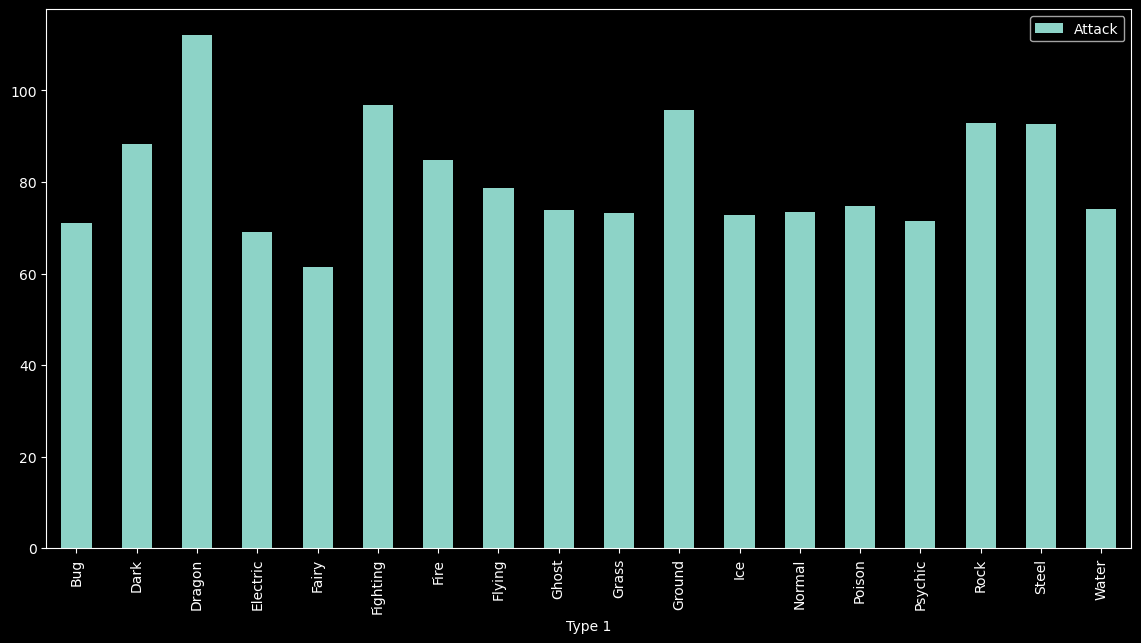

In [4]:
# find the mean stats in each category ignoring non-numeric stats
df[["Type 1", "Attack"]].groupby(["Type 1"]).mean(numeric_only=True).plot(
    figsize=(14, 7), kind="bar"
)

In [ ]:
# show the mean HP stat across Type 1 and Legendary status
df.pivot_table(index="Type 1", columns="Legendary", values="HP", aggfunc="mean")

Legendary,False,True
Type 1,,
Bug,56.884058,NaN
Dark,64.655172,98.000000
Dragon,72.650000,101.083333
Electric,57.325000,84.500000
Fairy,70.875000,126.000000
Fighting,69.851852,NaN
Fire,67.085106,96.400000
Flying,62.500000,79.000000
Ghost,58.733333,150.000000


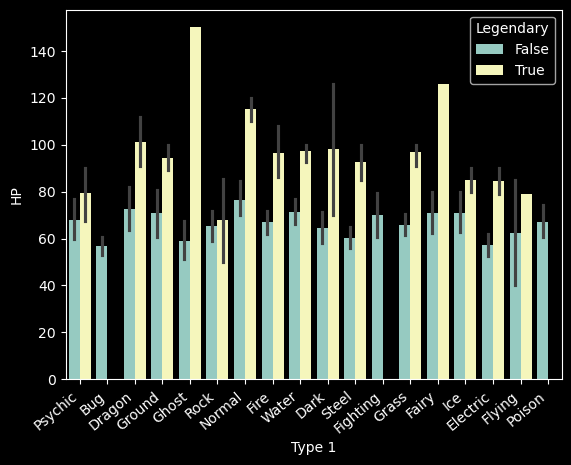

In [6]:
ax = sns.barplot(x="Type 1", y="HP", data=df, hue="Legendary")
# set xticks before xticklabels to suppress a warning
# assign throwaway variable _ to suppress output
_ = ax.set_xticks(ax.get_xticks())
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")